# Description
 - This dataset(loan_data.csv) is taken from public domain. Data set includes attributes like age, gender,principal amount, terms, loan_status, etc. customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Techniques involved are Logistic Regression, Decision Tree & Random Forest to predict the loan_status. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Loan payments data.csv



In [2]:
data=pd.read_csv("../input/Loan payments data.csv")

In [3]:
data.head(4)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male


In [4]:
data['Principal'].unique()

array([1000,  300,  800,  900,  700,  500])

In [5]:
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [6]:
data1=data.copy()

In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['loan_status']=le.fit_transform(data['loan_status'])
data['Gender']=le.fit_transform(data['Gender'])
data['education']=le.fit_transform(data['education'])
data['past_due_days']=le.fit_transform(data['past_due_days'])

In [8]:
data.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,2,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,2,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,2,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,2,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1
4,xqd20160005,2,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,170,28,3,0


In [9]:
df =data1[data['past_due_days'] ==60 ]
df.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
299,xqd20160300,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 11:00,NaN,28,college,male


In [10]:
data1.groupby('loan_status')['Gender'].agg(['count'])

,count
loan_status,
COLLECTION,100
COLLECTION_PAIDOFF,100
PAIDOFF,300


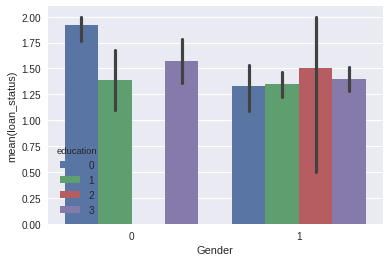

In [11]:
sns.barplot(x="Gender", y="loan_status", hue="education", data=data);

In [12]:
data['past_due_days'].unique()

array([ 83, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162,
       161, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149,
       148, 147, 174, 175, 176, 177, 205, 204, 203, 202, 201, 200, 199,
       198, 197, 196, 195, 194, 193, 206, 192, 190, 189, 188, 187, 186,
       185, 184, 183, 182, 181, 180, 179, 178, 146, 145, 144, 113, 111,
       110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,  99,  98,
        97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,  86,  85,
       112, 114, 143, 115, 142, 141, 140, 139, 138, 137, 136, 135, 134,
       133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121,
       120, 119, 118, 117, 116, 191, 208, 316, 209, 298, 297, 296, 295,
       294, 293, 292, 291, 290, 289, 288, 287, 286, 285, 284, 283, 282,
       281, 280, 279, 278, 277, 276, 275, 274, 273, 272, 299, 300, 301,
       302, 330, 329, 328, 327, 326, 325, 324, 323, 322, 321, 320, 319,
       318, 331, 317, 315, 314, 313, 312, 311, 310, 309, 308, 30

In [13]:
#Men are likly to keep due days
x=data.groupby('Gender')['past_due_days'].agg(['sum'])
x=pd.DataFrame(x)
x

,sum
Gender,
0,9677
1,48332


In [14]:
x

,sum
Gender,
0,9677
1,48332


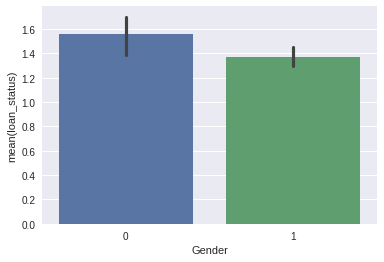

In [15]:
sns.barplot(x='Gender',y='loan_status',data=data)

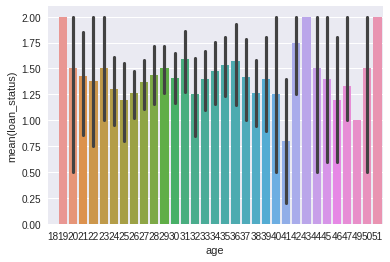

In [16]:
sns.barplot(x='age',y='loan_status',data=data)

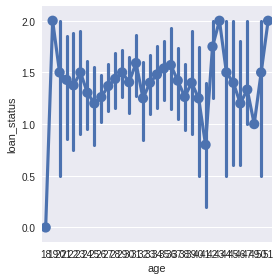

In [17]:
sns.factorplot(x='age',y='loan_status',data=data)

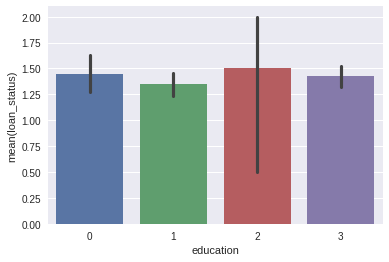

In [18]:
sns.barplot(x='education',y='loan_status',data=data)

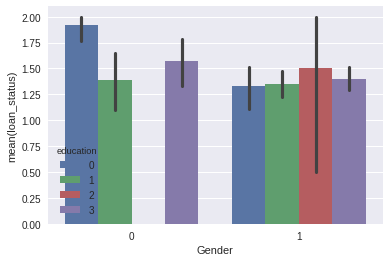

In [19]:
sns.barplot(x='Gender', y = 'loan_status', hue = 'education', data = data)

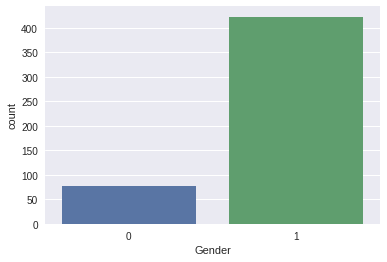

In [20]:
sns.countplot(x='Gender',data=data)

In [21]:
data.head(4)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,2,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,83,45,1,1
1,xqd20168902,2,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,173,50,0,0
2,xqd20160003,2,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,172,33,0,0
3,xqd20160004,2,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,171,27,3,1


In [22]:
data2=data
data2.drop('Loan_ID', axis=1, inplace=True)
label = data2.pop('loan_status')

In [23]:
data2.drop('effective_date', axis=1, inplace=True)
data2.drop('due_date', axis=1, inplace=True)
data2.drop('paid_off_time', axis=1, inplace=True)

In [24]:
data2.head(5)

,Principal,terms,past_due_days,age,education,Gender
0,1000,30,83,45,1,1
1,1000,30,173,50,0,0
2,1000,30,172,33,0,0
3,1000,15,171,27,3,1
4,1000,30,170,28,3,0


# Prediction model########

In [26]:
#Train-Test split
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data2, label, test_size = 0.2, random_state = 42)

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)

Training score:  0.9625
Testing score:  0.97


In [28]:
coeff_df = pd.DataFrame(data2.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Correlation"] = pd.Series(logis.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Features,Correlation
1,past_due_days,0.002610
0,terms,0.000265
4,Gender,-0.014330
3,education,-0.014334
2,age,-0.021472


In [29]:
#decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

Training score:  1.0
Testing score:  0.97


In [30]:
#decision tree
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

Training score:  1.0
Testing score:  0.96


In [31]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_train, label_train)
rfc_score_train = rfc.score(data_train, label_train)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(data_test, label_test)
print("Testing score: ",rfc_score_test)

Training score:  0.9975
Testing score:  0.96


In [32]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression',  'Decision Tree', 'Random Forest'],
        'Training_Score' : [logis_score_train,  dt_score_train, rfc_score_train],
        'Testing_Score'  : [logis_score_test, dt_score_test, rfc_score_test]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Testing_Score,Training_Score
0,Logistic Regression,0.97,0.9625
1,Decision Tree,0.96,1.0000
2,Random Forest,0.96,0.9975
